In [39]:
from recommender.User import User
from recommender.Articles import ArticlesModel, ArticlesVec, ArticlesGeo
from recommender.Clustering import Clustering
from recommender.DataLoader import DataLoader
import numpy as np
from gensim.models import KeyedVectors
import gensim.downloader as api
import folium

In [40]:
model = KeyedVectors.load_word2vec_format(api.load('word2vec-google-news-300', return_path=True), binary=True, limit=100000)

In [41]:
topics = np.load('data/topics.npy')

## DataLoader

In [42]:
dataloader = DataLoader(model=model)
data = dataloader.load_preprocess()

## Articles

In [43]:
articles = ArticlesModel(data, topics, model)

#### Save articles vectorization based on the topics

In [6]:
articles.save_vec_by_topics()

#### Get the summary of the best articles by arbitrary topic(s)

In [10]:
ids = articles.ids_top_articles_by_topic(['Bern', 'Mountain'])
for idx in ids:
    print(articles.get_summary(idx) + '\n')

The Rosenlaui Glacier, located to the south of Meiringen, in the canton of Bern, might be small, since it has an area of only six square kilometers, but thanks to this glacier two beautiful natural attractions have come into being - Glacier Gorge Rosenlaui and the world-famous Reichenbach Falls.

Les Diablerets, an important centre for adventure sports, lies between Lake Geneva and Gstaad at an altitude of 1200 metres. Even in summer, the Glacier 3000 ski region in the heart of the Vaud Alps offers skiing and glacier enjoyment over an expansive area.

The vacation region around the Black Lake and in the Eastern Freiburg Pre-Alps (Voralpen) is well-known for its authenticity and its wild, romantic natural landscape, which includes the dark appearance of the Black Lake and the Brecca Abyss, an Alpine valley formed by glaciers.

The Bern bear pit is an attraction that is known far beyond the borders of Switzerland. Since 2009 the bears of Bern also have a modern 6,000 square meters park a

#### Get information about a specific article with known idx

In [11]:
idx = 0

summary = articles.get_summary(idx)
content = articles.get_content(idx)
preprocessed = articles.get_preprocessed(idx)
vector = articles.get_vec(idx)

print(summary, content, preprocessed, vector, sep='\n\n')

Situated in the heart of Gruyère, the city of Bulle is the administrative capital of this largely agricultural region and has a wealth of attractions to appeal to all tastes.

In this preserved and unspoilt environment, the visitor can enjoy the most varied and seasonal activities in a pastoral setting.Firmly anchored in ancestral and typical traditions, its museum charts the marked development of the town and its surrounding region. Renowned as a cultural meeting place, the city boasts folk markets, livestock fairs, salons, exhibitions, theatres, concerts and shows which attract a very diverse public audience.The culinary arts remain the focal point for many visitors to Gruyère, and each year the local restaurants offer Bénichon feast menus alongside regional specialities.

['Situated', 'heart', 'city', 'administrative', 'capital', 'largely', 'agricultural', 'region', 'wealth', 'attractions', 'appeal', 'tastes']

[0.0022415072728862455, 0.0018540512203218218, 0.001570759888912265, 0.8

#### Plot topic weights for a given article

Learn to ski in the place where the world's top ski athletes compete: on Corviglia above St. Moritz. Your first ski lesson is rewarded with a carriage ride to the slope and back.


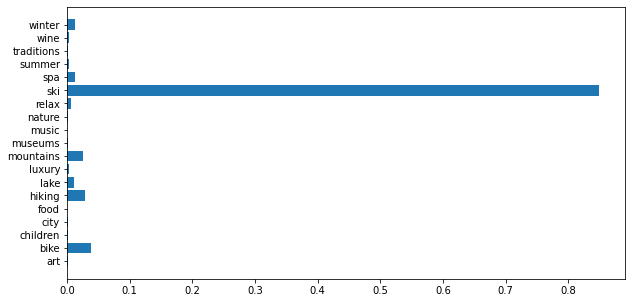

<Figure size 432x288 with 0 Axes>

In [44]:
idx = 417
articles.plot_weights(idx, print_content=False, save_path='images/img5.png')

#### Use a precomputed topics based vector representation for the articles to speed up the object initialization

In [ ]:
vec_by_topics = np.load('data/vec_articles.npy')
articles = ArticlesVec(data, topics, vec_by_topics)

## User

In [ ]:
topics

In [ ]:
choices = ['ski', 'spa']

user = User(topics, choices)

#### Recommend articles for the user

In [ ]:
n_recommendations = 5

recommended_articles_ids, recommended_articles_vec = articles.recommend_articles(user, n_recommendations)
for i, idx in enumerate(recommended_articles_ids):
    print(i, articles.get_summary(idx), sep=': ', end='\n\n')

In [ ]:
seen_articles = [0,3]

user.update(np.array(recommended_articles_vec)[seen_articles])
user.add_seen_articles(np.array(recommended_articles_vec)[seen_articles])

#### Plot topic weights for the user

In [8]:
user.plot_weights()

NameError: name 'user' is not defined

## Clustering

In [7]:
clustering = Clustering(data, model, cluster_by_words=False, n_clusters=5)

In [8]:
clustering.fit()
topics = clustering.generate_topics()
print(topics)

['German', 'mountains', 'museum', 'ice', 'just']


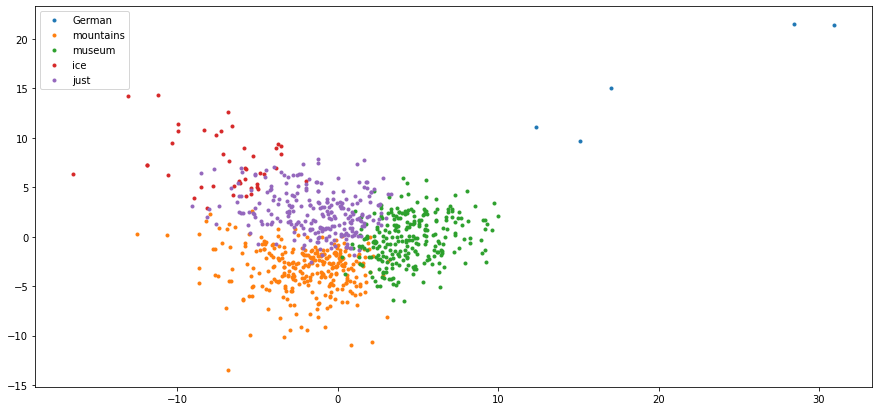

In [9]:
clustering.plot_clusters()

## Geographical data

In [33]:
vec_by_topics = np.load('data/vec_articles.npy')
articles = ArticlesGeo(data, topics, vec_by_topics)

In [34]:
choices = ['ski']

user = User(topics, choices)

In [35]:
comb_ids, comb_vec, dist, coordinates = articles.get_geo_recommendations(user, max_dist=25, max_n_activities=1, n_recommendations=5, n_best_articles=100)

Show all the articles in the combinations

In [36]:
for i, comb in enumerate(comb_ids):
    print(i)
    for article in comb:
        print(article, articles.get_summary(article))
        print()

0
132 This preparatory course for the legendary ski race offers participants a chance to push their limits.

1
417 Learn to ski in the place where the world's top ski athletes compete: on Corviglia above St. Moritz. Your first ski lesson is rewarded with a carriage ride to the slope and back.

2
20 one, two, ski is a package specially designed for ski beginners. The package includes a skiing day pass, rental gear and a one-hour ski lesson with a qualified teacher. One, two, ski is the easiest way to start skiing.

3
397 Snowboarders and freestyle skiers will find perfect conditions in the Gran Masta Park next to the Brenggen ski lift on the Hahnenmoos.

4
66 Ski touring doesn’t always have to mean a remote 3,000-metre peak. You can also try ski touring in ski resorts. Villars not only offers marked routes, but also introductory packages with everything you need for a ski tour.



Visualize combinations in the map

In [38]:
CH_COOR = [46.8, 8.8]  # coordinates of the center of Switzerland
COLORS = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
          'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
          'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

In [39]:
mapp = folium.Map(location=CH_COOR, zoom_start=7,
                     tiles='cartodbpositron', width=800, height=400)
_ = [[folium.CircleMarker(location=c, radius=1,
                     color=COLORS[i%len(COLORS)]).add_to(mapp)
 for c in coor] for i, coor in enumerate(coordinates)]
mapp